In [1]:
#Import Akses TensorFlow
import tensorflow as TF 
from tensorflow.keras.optimizers import RMSprop
#Mengimpor Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Import untuk Membaca File .zip dan Modul os Akses Folder Data
import zipfile, os

#Import direktori model train
from sklearn.model_selection import  train_test_split

#Import data tarin dan val ke direktori baru
import shutil

#Import Pengambian Files Image
from google.colab import files
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
#Download Dataset RockPaperScissors
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-10 13:44:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.01MB/s    in 4m 33s  

2021-05-10 13:49:18 (1.13 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#Mengekstrak File .zip
localzip = '/tmp/rockpaperscissors.zip'
zipRef = zipfile.ZipFile(localzip,'r')
zipRef.extractall('/tmp')
zipRef.close()

In [4]:
#Melihat Isi File .zip
os.listdir ('/tmp/rockpaperscissors')

['paper', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [5]:
#Menampilkan Jumlah Gambar Pada Direktori RPS
print('Jumlah total gambar batu:', len(os.listdir('/tmp/rockpaperscissors/rock')))
print('Jumlah total gambar kertas:', len(os.listdir('/tmp/rockpaperscissors/paper')))
print('Jumlah total gambar gunting:', len(os.listdir('/tmp/rockpaperscissors/scissors')))

Jumlah total gambar batu: 726
Jumlah total gambar kertas: 712
Jumlah total gambar gunting: 750


In [6]:
#Membuat Base Direktori
base_direktori = "/tmp/rockpaperscissors/rps-cv-images/"

#Membuat Augmentasi Gambar Menggunakan Image Data Generator.
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range=0.2,
    fill_mode = 'nearest',
    #Ukuran Validation Set 40%
    validation_split = 0.4) 

In [7]:
#Generator Data Validasi 
#Membagi Dataset menjadi Train Set dan Validaton Set
train_generator = train_datagen.flow_from_directory(
    base_direktori,
    target_size = (150,150),
    shuffle = True,
    subset = 'training',
    class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
    base_direktori,
    target_size = (150,150),
    shuffle = True,
    subset = 'validation',
    class_mode = 'categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
#Membuat Jaringan Saraf Tiruan dengan Model Sequential
ModelSeq = TF.keras.models.Sequential([
  TF.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  TF.keras.layers.MaxPooling2D(2,2),
  TF.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  TF.keras.layers.MaxPooling2D(2,2),
  TF.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  TF.keras.layers.MaxPooling2D(2,2),
  TF.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  TF.keras.layers.MaxPooling2D(2,2),
  TF.keras.layers.Flatten(),
  TF.keras.layers.Dense(128, activation='relu'),
  TF.keras.layers.Dense(512, activation= 'relu'),
  TF.keras.layers.Dense(3, activation= 'softmax')])

#Melakukan Kompilasi Model
ModelSeq.compile(loss = 'categorical_crossentropy',
              optimizer = TF.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
#Keluaran Hasil Akurasi Model Sequential
ModelSeq.fit( train_generator,
             steps_per_epoch = 20,
             epochs = 15,
             validation_data = validation_generator,
             validation_steps = 4,
             verbose =2)

Epoch 1/15
20/20 - 36s - loss: 1.1033 - accuracy: 0.3156 - val_loss: 1.1002 - val_accuracy: 0.2734
Epoch 2/15
20/20 - 35s - loss: 1.0819 - accuracy: 0.3844 - val_loss: 1.0491 - val_accuracy: 0.5391
Epoch 3/15
20/20 - 35s - loss: 0.9697 - accuracy: 0.5312 - val_loss: 0.8374 - val_accuracy: 0.6484
Epoch 4/15
20/20 - 33s - loss: 0.6807 - accuracy: 0.6984 - val_loss: 0.7885 - val_accuracy: 0.6875
Epoch 5/15
20/20 - 35s - loss: 0.6147 - accuracy: 0.7422 - val_loss: 0.6665 - val_accuracy: 0.7031
Epoch 6/15
20/20 - 33s - loss: 0.5629 - accuracy: 0.7508 - val_loss: 0.7304 - val_accuracy: 0.7266
Epoch 7/15
20/20 - 33s - loss: 0.5758 - accuracy: 0.7541 - val_loss: 0.5718 - val_accuracy: 0.7578
Epoch 8/15
20/20 - 35s - loss: 0.4994 - accuracy: 0.7859 - val_loss: 0.5639 - val_accuracy: 0.7656
Epoch 9/15
20/20 - 35s - loss: 0.5252 - accuracy: 0.7937 - val_loss: 0.4871 - val_accuracy: 0.8047
Epoch 10/15
20/20 - 35s - loss: 0.5539 - accuracy: 0.7906 - val_loss: 0.4328 - val_accuracy: 0.8672
Epoch 11/

Saving v1b7FBFD4ZbLJnhB.png to v1b7FBFD4ZbLJnhB.png
v1b7FBFD4ZbLJnhB.png
paper


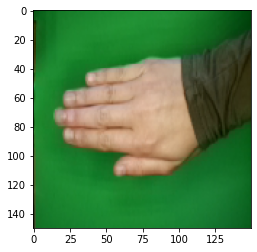

In [10]:
#Memprediksi Unggahan Gambar RPS
#Membuat Function untuk Mengunggah File dan Hasil Prediksi
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = ModelSeq.predict(images, batch_size=10)

#Membuat Definisi untuk Mengecek Hasil Output
  print(fn)
  if classes[0,0]!=1:
    print('rock')
  elif classes[0,1]!=1:
    print('paper')
  else:
    print('scissors')